In [33]:
cd '/content/drive/My Drive/intern_pyth/ML/'

/content/drive/My Drive/intern_pyth/ML


# Data preparation:

In [0]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import statsmodels.api as sm  #to use the Logit()

import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [0]:
#import the dataset
mydata=pd.read_csv('pima.csv',sep=",")

In [36]:
#take a look at the dataset
print(mydata.shape) #768*9

(768, 9)


In [37]:
mydata.head() 
#Predictor variables:
#NPG= number of times pregnant
#PGL= Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
#DIA= Diastolic blood pressure (mm Hg) 
#TSF=Triceps skin fold thickness (mm) 
#INS= 2-Hour serum insulin (mu U/ml) 
#BMI=Body mass index (weight in kg/(height in m)^2) 
#DPF= Diabetes pedigree function 
#AGE= Age (years) 

#Output variable:
#Diabet= 0/1


,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
#summarize the data
print(mydata.describe())

              NPG         PGL         DIA  ...         DPF         AGE      Diabet
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [39]:
#find the standard deviation of each column
print(mydata.std())

NPG         3.369578
PGL        31.972618
DIA        19.355807
TSF        15.952218
INS       115.244002
BMI         7.884160
DPF         0.331329
AGE        11.760232
Diabet      0.476951
dtype: float64


# Data visualization:

In [0]:
import pylab as pyl #for generating plots: show()

In [0]:
import matplotlib.pyplot as plt #for tight_layout()

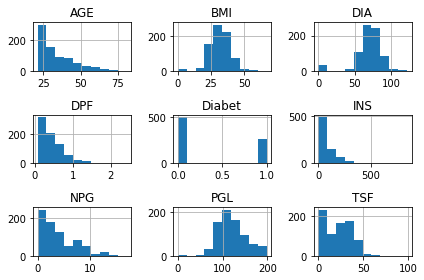

In [42]:
#plot histograms of all the 9 columns
mydata.hist()


plt.tight_layout() #tight_layout(): adjust spacing between subplots to minimize the overlaps.
pyl.show()         #show the histograms

# Create placeholder for y-intercept

In [43]:
#explicitly create a placeholder for y-intercept: b0
mydata['int']=1
mydata.head()

,NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE,Diabet,int
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


# **Model Construction**

In [0]:
inp_df = mydata.drop(mydata.columns[[8]], axis=1)
out_df = mydata.drop(mydata.columns[[0,1,2,3,4,5,6,7,9]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [0]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()

In [46]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (614, 9)
Output Shape (154, 9)


In [0]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [0]:
def sigmoid_activation(result):
    final_result = 1.0/(1.0+np.exp(-1.0 * result))
    return final_result

In [0]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [0]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [0]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [52]:
#Get number of features
n_features = X_tr_arr.shape[1]

print('Number of Features', n_features)
w, b = weightInitialization(n_features)

X_tr_arr = X_tr_arr.astype(float)
y_tr_arr = y_tr_arr.astype(float)
w = w.astype(float)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 9
Optimized weights [[0.04090975 0.0901197  0.0121618  0.01034962 0.01862823 0.05922672
  0.03080363 0.05487083 0.        ]]
Optimized intercept -0.06501211742531268
Training Accuracy 0.754071661237785
Test Accuracy 0.7077922077922078


**For Prediction**

In [0]:
def pred1(NPG,PGL,DIA,TSF,INS,BMI,DPF,AGE):
    return w[0,8]+ w[0,0]*NPG + w[0,1]*PGL + w[0,2]*DIA + w[0,3]*TSF + w[0,4]*INS + w[0,5]*BMI + w[0,6]*DPF + w[0,7]*AGE

In [54]:

mod1= pred1(8,196,30,38,230,45,0.180,34)
print(mod1)

27.5697269059804


In [55]:
pre= np.exp(mod1)/ (1+ np.exp(mod1)) #formula e^y1 / (1 + e^y1)
print(pre) 

0.9999999999989367


In [0]:
# Thus, there is a 99% chance of the above patient getting diabetes (ie dependent variable y=1)